# Ejercicio 1

## a.

In [87]:
from src.catching import attempt_catch
from src.pokemon import PokemonFactory, StatusEffect
from src.images import get_image, offset_image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json

Inicializamos la clase factory, que se utilizará para crear a cada pokemon y guardarlo en un arreglo, además de un arreglo con el nombre de cada pokeball a utilizar.

In [88]:
factory = PokemonFactory("pokemon.json")
POKEBALLS = ["pokeball", "ultraball", "fastball", "heavyball"]  
POKEBALLS_catch = [0, 0, 0, 0]
POKEBALLS_catch_error = [0, 0, 0, 0]

HP = 1
LEVEL = 100
COLORS = ['red', 'grey', 'yellow', 'blue']

with open("pokemon.json", "r") as c:
    pokemon_db = json.load(c)
        
pokemons = [factory.create(pokemon, LEVEL, StatusEffect.NONE, HP) for pokemon in pokemon_db]        

En el siguiente código se realiza, con todas las pokeballs, 100 intentos de atrapar a cada pokemon y se muestra el gráfico de los porcentajes de atrapadas en función del tipo de pokeball utilizada.

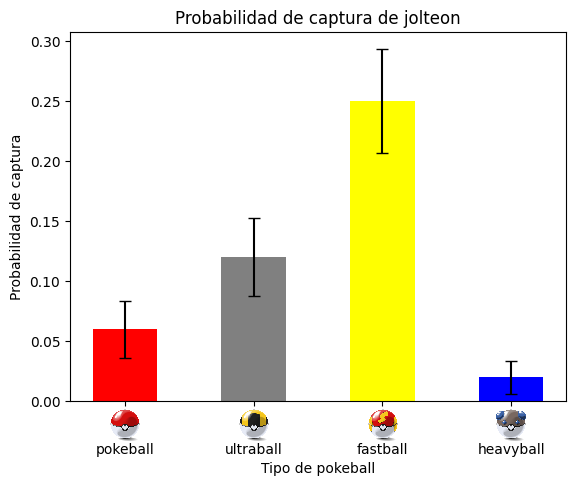

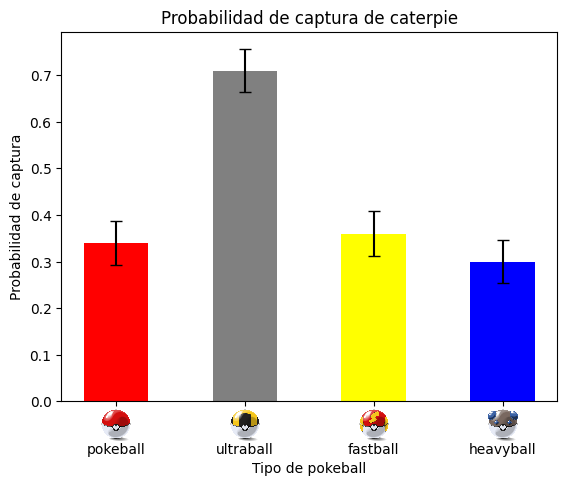

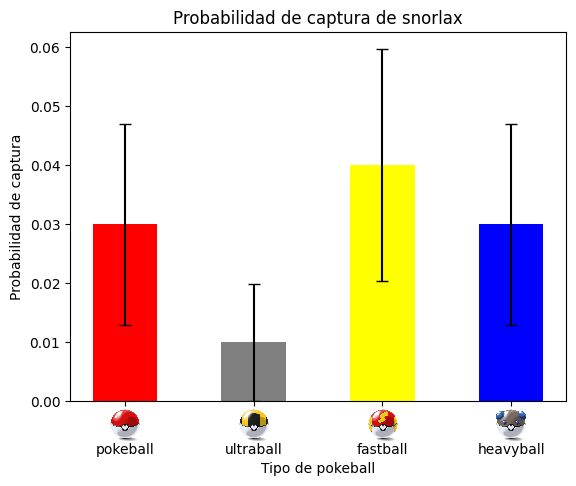

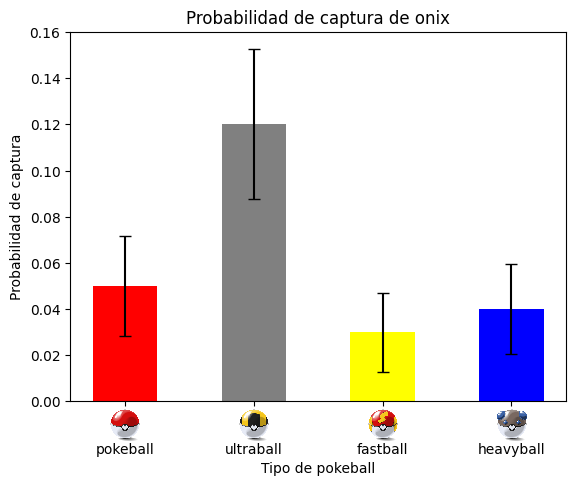

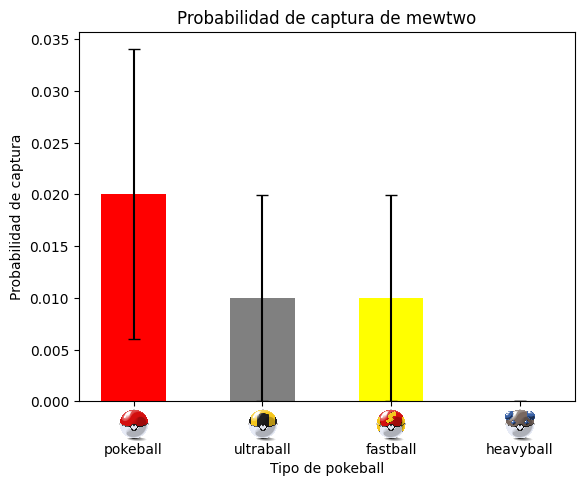

In [89]:
for pokemon in pokemons:
    capture_rates = []
    std_errors = []
    for pokeball in POKEBALLS:
        capture_attempts = []
        for i in range(100):
            capture_attempts.append(attempt_catch(pokemon, pokeball)[0])

        capture_rate = sum(capture_attempts) / len(capture_attempts)        
        capture_rates.append(capture_rate)
        # El cálculo del error estándar se realiza dividiendo la desviación estándar de la
        # muestra por la raíz cuadrada del tamaño de la muestra.
        std_error = np.std(capture_attempts) / np.sqrt(len(capture_attempts))
        std_errors.append(std_error)
        
    fig, ax = plt.subplots()

    for i in range(0, 4):
        POKEBALLS_catch[i] += capture_rates[i]
        POKEBALLS_catch_error[i] += std_errors[i]

    
    ax.bar(range(len(POKEBALLS)), capture_rates, yerr=std_errors, capsize=4, width=0.5, align="center", color=COLORS)
    ax.set_xticks(range(len(POKEBALLS)))
    ax.set_xticklabels(POKEBALLS)
    ax.tick_params(axis='x', which='major', pad=26)
    
    plt.title(f'Probabilidad de captura de {pokemon.name}')
    plt.xlabel('Tipo de pokeball')
    plt.ylabel('Probabilidad de captura')

    for i, c in enumerate(POKEBALLS):
        offset_image(i, c, ax)
        
    plt.show()

En los gráficos generados anteriormente podremos apreciar cual es el promedio de captura de cada pokeball según el tipo de pokemon.

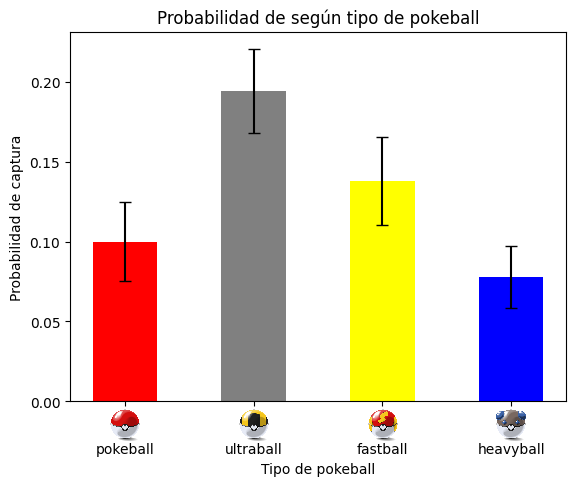

In [90]:

for i in range(0, 4):
    POKEBALLS_catch[i] /= len(pokemons)
    POKEBALLS_catch_error[i] /= len(pokemons)
    
fig2, ax2 = plt.subplots()

ax2.bar(range(len(POKEBALLS)), POKEBALLS_catch, yerr=POKEBALLS_catch_error, capsize=4, width=0.5, align="center", color=COLORS)
ax2.set_xticks(range(len(POKEBALLS)))
ax2.set_xticklabels(POKEBALLS)
ax2.tick_params(axis='x', which='major', pad=26)

plt.title(f'Probabilidad de según tipo de pokeball')
plt.xlabel('Tipo de pokeball')
plt.ylabel('Probabilidad de captura')

for i, c in enumerate(POKEBALLS):
	offset_image(i, c, ax2)

plt.show()

Además, al finalizar cada una de las 100 tiradas almacenamos el resultado parcial para cada pokemon, y de esta forma podemos conocer el promedio general de captura de cada pokeball, indistintamente de cual se haya capturado.

## b.

Efectivamente, dadas ciertas propiedades intrínsecas de cada pokemon la posibilidad de atraparlos se ve modificada.
Por ejemplo:
- Jolteon tiene 130 en su estadistica de velocidad, por lo que ,observando el gráfico, podemos ver que la probabilidad de atraparlo con la fastball será, en la mayoría de caso,s razonablemente superior comparado a las otras pokeballs. Esto se debe a que la pokeball fastball incrementa la posibilidad de atrapar un pokemon si este tiene un valor mayor a 100 en su estadística de velocidad.
- De forma análoga, ocurre lo mismo con Snorlax (quien tiene un peso de 1014.1 kg) y la heavyball, que aumenta su probabilidad de capturar un pokemon de acuerdo al peso total del mismo. Sin embargo, la posibilidad de atrapar un pokemon con la heavyball decrece si el peso del mismo es menor a 451, lo cual sucede en los demás casos (exceptuando Onix y el ya mencionado Snorlax).